<a href="https://colab.research.google.com/github/RatihParamita/dataMining/blob/main/Latihan2Week14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install spotipy
import numpy as np
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 5.4 MB/s eta 0:00:00


In [4]:
client_id = '400afd1a8ae34360a3629f55686b8155'
client_secret = 'a6164a6cfaef4a8c86aa9b491f9f8f14'

In [5]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [6]:
# Fungsi untuk mendapatkan track playlist dari Spotify
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
# Fungsi untuk mendapatkan fitur audio dari playlist
def get_audio_features(tracks):
    track_ids = [track['track']['id'] for track in tracks]
    features = sp.audio_features(track_ids)
    return features

In [8]:
# Mengambil playlist Spotify
username = 'hi63ctfn4m98iensfx8ebkcxs'
playlist_id = '0CSpbbSsJ5RSiyaSJhi48W'
tracks = get_playlist_tracks(username, playlist_id)
# Mengambil fitur audio untuk lagu-lagu dari playlist
features = get_audio_features(tracks)

In [9]:
track_names = [track['track']['name'] for track in tracks]

In [10]:
df = pd.DataFrame(features)
df['track_name'] = track_names  # tambahkan nama lagu ke DataFrame

In [11]:
df = df.dropna()

In [15]:
# Menentukan fitur yang akan digunakan untuk clustering
X = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'tempo', 'valence']]
# Menentukan jumlah cluster
n_clusters = 3
# Membuat dan melatih model K-Means
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)
# Mendapatkan label dari clustering
labels = kmeans.labels_
# Mendapatkan pusat cluster
centers = kmeans.cluster_centers_

In [16]:
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5353105695808493


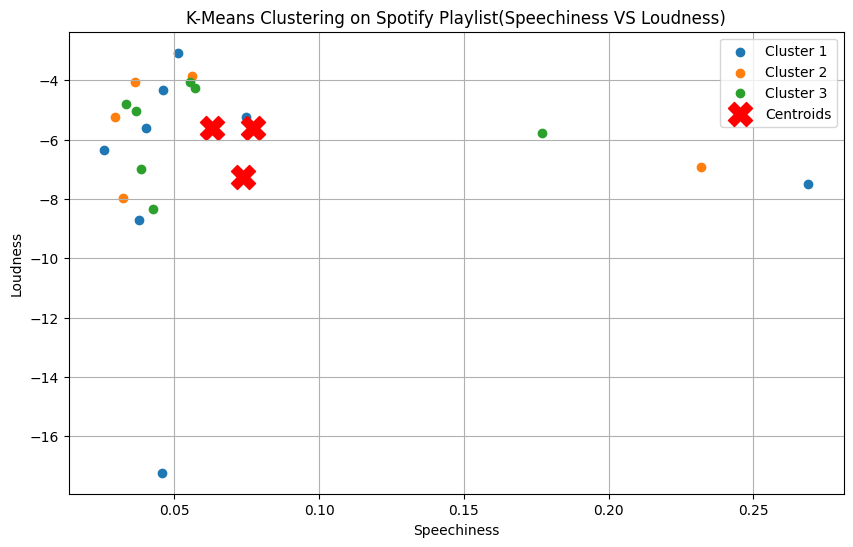

In [17]:
# Plot hasil clustering
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    # Memilih data yang termasuk dalam cluster i
    cluster_X = X[labels == i]
    # Plot data cluster dengan warna yang berbeda
    plt.scatter(cluster_X['speechiness'], cluster_X['loudness'], label=f'Cluster {i + 1}')
# Plot centroid
plt.scatter(centers[:, X.columns.get_loc('speechiness')], centers[:, X.columns.get_loc('loudness')], s=300, c='red', label='Centroids', marker='X')
plt.xlabel('Speechiness')
plt.ylabel('Loudness')
plt.title('K-Means Clustering on Spotify Playlist(Speechiness VS Loudness)')
plt.legend()
plt.grid(True)
plt.show()